In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Data

In [28]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
data_info = pd.read_csv('data/data_info.csv', encoding = 'cp949')

In [11]:
train.head(3)

,ID,Utterance,Speaker,Dialogue_ID,Target
0,TRAIN_0000,also I was the point person on my company’s tr...,Chandler,0,neutral
1,TRAIN_0001,You must’ve had your hands full.,The Interviewer,0,neutral
2,TRAIN_0002,That I did. That I did.,Chandler,0,neutral


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           9989 non-null   object
 1   Utterance    9989 non-null   object
 2   Speaker      9989 non-null   object
 3   Dialogue_ID  9989 non-null   int64 
 4   Target       9989 non-null   object
dtypes: int64(1), object(4)
memory usage: 390.3+ KB


In [12]:
test.head(3)

,ID,Utterance,Speaker,Dialogue_ID
0,TEST_0000,Why do all the coffee cups have figures below?,Mark,0
1,TEST_0001,"Oh. It's so Monica can follow. Of this way, if...",Rachell,0
2,TEST_0002,You know what?,Rachell,0


In [13]:
data_info

,feature,information,type
0,ID,고유번호,object
1,Utterance,발화문,object
2,Speaker,발화자,object
3,Dialogue_ID,Dialogue 구분 번호,int
4,Target,감정,object


### EDA 및 전처리

#### Utterance (발화문)

In [16]:
# !pip install nltk
import nltk

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [17]:
train['Utterance'][0]

'also I was the point person on my company’s transition from the KL-5 to GR-6 system.'

In [3]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence

In [19]:
for i in train['Utterance'] :
    print(text_to_word_sequence(i))
    

['also', 'i', 'was', 'the', 'point', 'person', 'on', 'my', 'company’s', 'transition', 'from', 'the', 'kl', '5', 'to', 'gr', '6', 'system']
['you', 'must’ve', 'had', 'your', 'hands', 'full']
['that', 'i', 'did', 'that', 'i', 'did']
['so', 'let’s', 'talk', 'a', 'little', 'bit', 'about', 'your', 'duties']
['my', 'duties', 'all', 'right']
['now', 'you’ll', 'be', 'heading', 'a', 'whole', 'division', 'so', 'you’ll', 'have', 'a', 'lot', 'of', 'duties']
['i', 'see']
['but', 'there’ll', 'be', 'perhaps', '30', 'people', 'under', 'you', 'so', 'you', 'can', 'dump', 'a', 'certain', 'amount', 'on', 'them']
['good', 'to', 'know']
['we', 'can', 'go', 'into', 'detail']
['no', 'don’t', 'i', 'beg', 'of', 'you']
['all', 'right', 'then', 'we’ll', 'have', 'a', 'definite', 'answer', 'for', 'you', 'on', 'monday', 'but', 'i', 'think', 'i', 'can', 'say', 'with', 'some', 'confidence', 'you’ll', 'fit', 'in', 'well', 'here']
['really']
['absolutely', 'you', 'can', 'relax']
['but', 'then', 'who', 'the', 'waitress',

#### Dialogue_ID

하나간의 대화를 뜻함
- Speaker 간의 대화는 같은 대화 내에서 이루어짐
- Dialogue_ID가 다르면 다른 대화

`train` dataset의 Dialogue는 총 1039개 / `test` dataset의 Dialogue는 총 280개

In [43]:
train['Dialogue_ID'].unique()

array([   0,    1,    2, ..., 1036, 1037, 1038], dtype=int64)

In [41]:
test['Dialogue_ID'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

`train` dataset과 `test` dataset의 `Dialogue_ID`가 같아도, 단지 각 대화를 구분하는 ID일 뿐 dataset 별로 다른 대화이기 때문에 훈련에서 제외함

#### Target

- neutral : 감정 없음
- surprise : 놀람
- fear : 두려움
- sadness : 슬픔
- joy : 기쁨
- disgust : 싫음
- anger : 화남

In [21]:
train['Target'].unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

감정없음(중립)이 가장 많고, 그에 비해 다른 감정의 수는 적음
→ 감정 수의 차이가 많아, neutral을 더 찰 예측할 가능성 있으므로 `oversampling` 필요!

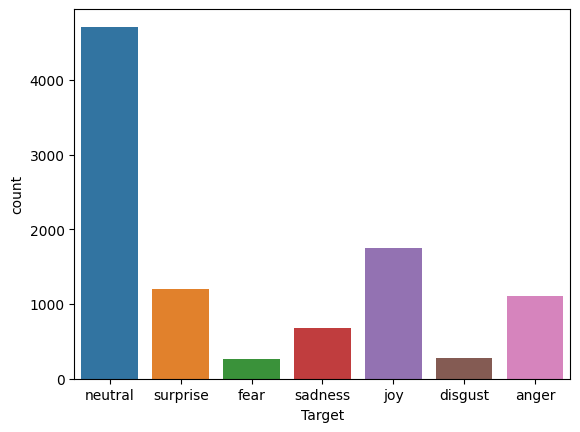

In [36]:
sns.countplot(x = "Target", data = train)
plt.show()

머신러닝 알고리즘은 숫자형의 피처 데이터만 입력 받을 수 있기 때문에 문자 형태의 데이터를 피처 데이터로 변환

In [51]:
from sklearn.preprocessing import LabelEncoder

In [57]:
le = LabelEncoder()

train['Target'] = le.fit_transform(train['Target'])

In [59]:
train['Target'].unique()

array([4, 6, 2, 5, 3, 1, 0], dtype=int64)